<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/sjchoi86/upstage-basic-deeplearning/blob/main/notebook/mlp.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/sjchoi86/upstage-basic-deeplearning/blob/main/notebook/mlp.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View Source</a>
  </td>
</table>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Multilayer Perceptron (MLP)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn  # neural network
import torch.optim as optim  # optimization
import torch.nn.functional as F  # functional
%matplotlib inline
%config InlineBackend.figure_format='retina'  # plot 화질 높게
print ("PyTorch version:[%s]."%(torch.__version__))
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print ("device:[%s]."%(device))

# device:[cuda:0]. -> GPU 활용하고 있다는 의미

PyTorch version:[1.7.0+cu101].
device:[cuda:0].


### Dataset

In [3]:
from torchvision import datasets,transforms
mnist_train = datasets.MNIST(root='./data/',train=True,transform=transforms.ToTensor(),download=True)
mnist_test = datasets.MNIST(root='./data/',train=False,transform=transforms.ToTensor(),download=True)
print ("mnist_train:\n",mnist_train,"\n")
print ("mnist_test:\n",mnist_test,"\n")
print ("Done.")

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!
mnist_train:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train
    StandardTransform
Transform: ToTensor() 

mnist_test:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test
    StandardTransform
Transform: ToTensor() 

Done.


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### Data Iterator

In [4]:
BATCH_SIZE = 256  # SGD, mini-batch로 데이터 가져온다
# shuffle=True -> 다음 epoch때 새롭게 셔플해준다
train_iter = torch.utils.data.DataLoader(mnist_train,batch_size=BATCH_SIZE,shuffle=True,num_workers=1)
test_iter = torch.utils.data.DataLoader(mnist_test,batch_size=BATCH_SIZE,shuffle=True,num_workers=1)
print ("Done.")

Done.


### Define the MLP model

In [5]:
# PyTorch에서는 class로 model을 만든다
# super class로 nn.Module 가져온다 -> 기본적인 forward 함수 등을 상속해서 사용

class MultiLayerPerceptronClass(nn.Module):  # Class 이름 앞에 대문자!
    """
        Multilayer Perceptron (MLP) Class
    """
    def __init__(self,name='mlp',xdim=784,hdim=256,ydim=10):
        super(MultiLayerPerceptronClass,self).__init__()
        self.name = name
        self.xdim = xdim
        self.hdim = hdim
        self.ydim = ydim
        self.lin_1 = nn.Linear(
            # FILL IN HERE
            self.xdim, self.hdim
        )
        self.lin_2 = nn.Linear(
            # FILL IN HERE
            self.hdim, self.ydim
        )
        self.init_param() # initialize parameters
        # PyTorch는 알아서 nn.Linear call 할 때 initialize 해주는데
        # 가끔 from scratch training 원할 때 새롭게 initialize 해주고 싶을 수 있으므로

        
    def init_param(self):
        nn.init.kaiming_normal_(self.lin_1.weight)
        nn.init.zeros_(self.lin_1.bias)  # bias는 0으로
        nn.init.kaiming_normal_(self.lin_2.weight)
        nn.init.zeros_(self.lin_2.bias)

    def forward(self,x):  # class를 만든 이유가 forward 활용하기 위해
        net = x
        net = self.lin_1(net)  # affine transform
        net = F.relu(net)
        net = self.lin_2(net)
        return net

M = MultiLayerPerceptronClass(name='mlp',xdim=784,hdim=256,ydim=10).to(device)
loss = nn.CrossEntropyLoss()
optm = optim.Adam(M.parameters(),lr=1e-3)  # 어떤 parameter로 optimze 할 건지
print ("Done.")

# PyTorch의 장점: session, run이 없다
# 네트워크를 만들고 바로 run 할 수 있다

Done.


### Simple Forward Path of the MLP Model

In [6]:
x_numpy = np.random.rand(2,784)
# 내가 활용하고 있는 device로 넣어줘야 한다 -> 그래야 활용 가능
x_torch = torch.from_numpy(x_numpy).float().to(device)
y_torch = M.forward(x_torch) # forward path
# y_torch = M(x_torch)  # forward 안해도 돌아간다, 알아서 forward를 불러온다
y_numpy = y_torch.detach().cpu().numpy() # torch tensor to numpy array
print ("x_numpy:\n",x_numpy)
print ("x_torch:\n",x_torch)
print ("y_torch:\n",y_torch)
print ("y_numpy:\n",y_numpy)

x_numpy:
 [[0.75438844 0.51398758 0.95340213 ... 0.13750336 0.33332565 0.95492246]
 [0.01589286 0.93048103 0.2522929  ... 0.64346974 0.65989908 0.33352158]]
x_torch:
 tensor([[0.7544, 0.5140, 0.9534,  ..., 0.1375, 0.3333, 0.9549],
        [0.0159, 0.9305, 0.2523,  ..., 0.6435, 0.6599, 0.3335]],
       device='cuda:0')
y_torch:
 tensor([[ 1.0196,  0.0720, -0.2197,  0.1359,  0.5632, -0.6918, -0.8555,  0.2907,
         -0.4745, -1.5324],
        [ 0.3810,  0.1069,  0.3571,  0.4979, -0.3068, -0.4235, -0.5534,  0.5707,
         -0.0762, -0.7535]], device='cuda:0', grad_fn=<AddmmBackward>)
y_numpy:
 [[ 1.0195936   0.07202187 -0.21967934  0.13594037  0.5631605  -0.69179714
  -0.8554797   0.29068318 -0.47452515 -1.5323877 ]
 [ 0.38096145  0.10693872  0.35708737  0.49789464 -0.3068329  -0.42348307
  -0.5533781   0.5707097  -0.07620102 -0.75350696]]


### Check Parameters

In [7]:
np.set_printoptions(precision=3)
n_param = 0
for p_idx,(param_name,param) in enumerate(M.named_parameters()):
    param_numpy = param.detach().cpu().numpy()
    n_param += len(param_numpy.reshape(-1))
    print ("[%d] name:[%s] shape:[%s]."%(p_idx,param_name,param_numpy.shape))
    print ("    val:%s"%(param_numpy.reshape(-1)[:5]))
print ("Total number of parameters:[%s]."%(format(n_param,',d')))

# CNN보다 파라미터 수 많을 때가 많다
# AlexNet 봤던 것처럼 dense layer parameter가 더 많다

[0] name:[lin_1.weight] shape:[(256, 784)].
    val:[-0.015 -0.055  0.016  0.065  0.009]
[1] name:[lin_1.bias] shape:[(256,)].
    val:[0. 0. 0. 0. 0.]
[2] name:[lin_2.weight] shape:[(10, 256)].
    val:[ 0.027 -0.055 -0.059 -0.099 -0.098]
[3] name:[lin_2.bias] shape:[(10,)].
    val:[0. 0. 0. 0. 0.]
Total number of parameters:[203,530].


### Evaluation Function

In [8]:
def func_eval(model,data_iter,device):
    with torch.no_grad():  # gradient 계산 안하겠다
        model.eval() # evaluate (affects DropOut and BN) - train과 test때 달라서
        n_total,n_correct = 0,0
        for batch_in,batch_out in data_iter:
            y_trgt = batch_out.to(device)
            model_pred = model(
                # FILL IN HERE
                batch_in.view(-1, 28*28).to(device)
            )
            _,y_pred = torch.max(model_pred.data,1)  # logit이기 때문에 max 취하면 prediction label 나옴
            n_correct += (
                # FILL IN HERE
                y_pred == y_trgt
            ).sum().item()
            n_total += batch_in.size(0)
        val_accr = (n_correct/n_total)
        model.train() # back to train mode 
    return val_accr
print ("Done")

Done


### Initial Evaluation

In [11]:
M.init_param() # initialize parameters
train_accr = func_eval(M,train_iter,device)
test_accr = func_eval(M,test_iter,device)
print ("train_accr:[%.3f] test_accr:[%.3f]."%(train_accr,test_accr))

train_accr:[0.072] test_accr:[0.069].


### Train

In [12]:
print ("Start training.")
# 원래라면 random.seed fix 해야함
M.init_param() # initialize parameters
M.train()
EPOCHS,print_every = 10,1
for epoch in range(EPOCHS):  # epoch - trian data 한 번 훑는 것
    loss_val_sum = 0
    # train_iter
    # index shuffling, batch index만큼 data 뽑아온다
    for batch_in,batch_out in train_iter:
        # Forward path
        y_pred = M.forward(batch_in.view(-1, 28*28).to(device))
        loss_out = loss(y_pred,batch_out.to(device))
        # Update
        optm.zero_grad()      # reset gradient 
        loss_out.backward()      # backpropagate, 각각의 weight에 대해 loss 차곡차곡 쌓임
        optm.step()      # optimizer update, backprop 결과 옮겨준다 
        loss_val_sum += loss_out
    loss_val_avg = loss_val_sum/len(train_iter)
    # Print
    if ((epoch%print_every)==0) or (epoch==(EPOCHS-1)):
        train_accr = func_eval(M,train_iter,device)
        test_accr = func_eval(M,test_iter,device)
        print ("epoch:[%d] loss:[%.3f] train_accr:[%.3f] test_accr:[%.3f]."%
               (epoch,loss_val_avg,train_accr,test_accr))
print ("Done")  

# CNN 아닌 linear model이다 보니 성능이 떨어진다

Start training.
epoch:[0] loss:[0.366] train_accr:[0.947] test_accr:[0.946].
epoch:[1] loss:[0.163] train_accr:[0.966] test_accr:[0.960].
epoch:[2] loss:[0.116] train_accr:[0.974] test_accr:[0.967].
epoch:[3] loss:[0.090] train_accr:[0.980] test_accr:[0.971].
epoch:[4] loss:[0.071] train_accr:[0.985] test_accr:[0.974].
epoch:[5] loss:[0.057] train_accr:[0.988] test_accr:[0.976].
epoch:[6] loss:[0.048] train_accr:[0.990] test_accr:[0.978].
epoch:[7] loss:[0.039] train_accr:[0.993] test_accr:[0.980].
epoch:[8] loss:[0.034] train_accr:[0.994] test_accr:[0.980].
epoch:[9] loss:[0.028] train_accr:[0.996] test_accr:[0.979].
Done


### Test

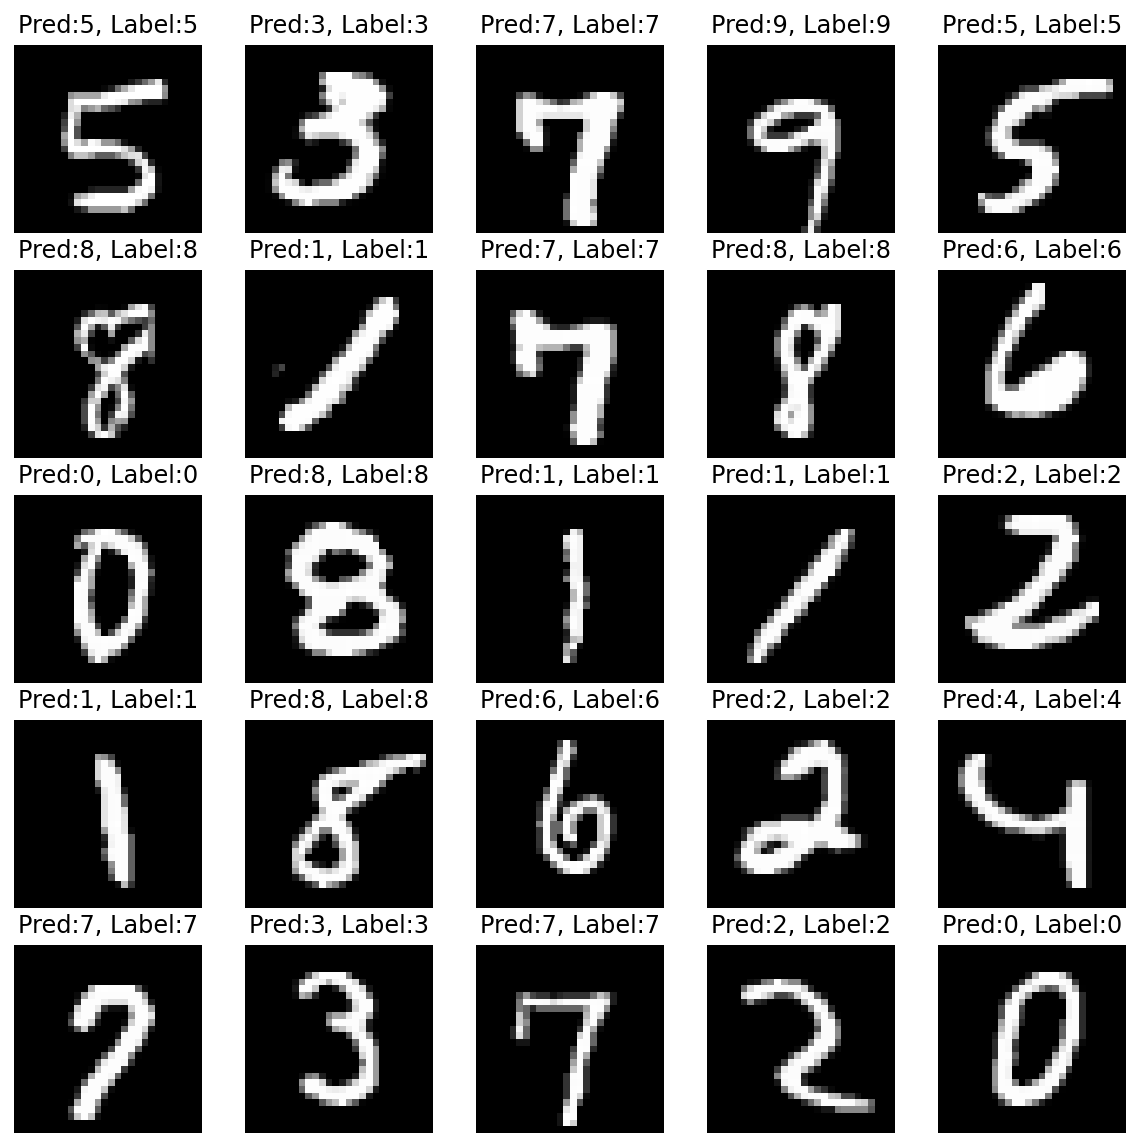

Done


In [13]:
n_sample = 25  # 전체 test data에 대해 25개의 이미지만 따온다
# M.init_param() 하면 모델 초기화되므로 거의 다 틀린 결과

sample_indices = np.random.choice(len(mnist_test.targets), n_sample, replace=False)
test_x = mnist_test.data[sample_indices]
test_y = mnist_test.targets[sample_indices]
with torch.no_grad():
    y_pred = M.forward(test_x.view(-1, 28*28).type(torch.float).to(device)/255.)
y_pred = y_pred.argmax(axis=1)
plt.figure(figsize=(10,10))
for idx in range(n_sample):
    plt.subplot(5, 5, idx+1)
    plt.imshow(test_x[idx], cmap='gray')
    plt.axis('off')
    plt.title("Pred:%d, Label:%d"%(y_pred[idx],test_y[idx]))
plt.show()    
print ("Done")